# Logistic Regression/ Predicting Numbers in images


In [1]:
#Importing Libraries and their associated methods
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
digits=load_digits()

In [2]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
print(f"Image Data Shape {digits.data.shape}")
print(f"Label Data Shape {digits.target.shape}")

Image Data Shape (1797, 64)
Label Data Shape (1797,)


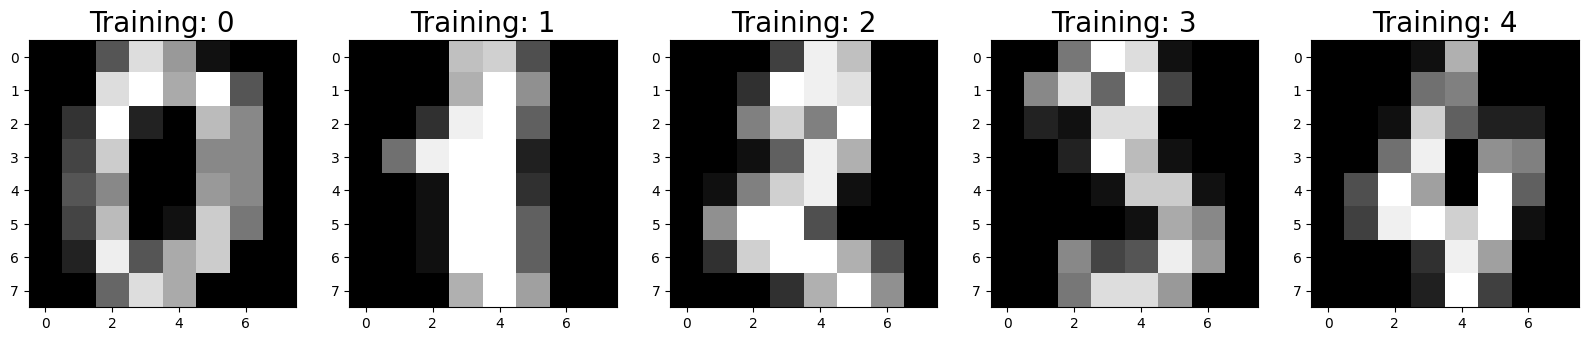

In [4]:
#Displaying some of the images and labels
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5, index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title(f"Training: {label}", fontsize=20 )  

In [ ]:
#Divide dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(digits.data, digits.target, test_size=0.23, random_state=2)

In [ ]:
print(x_train.shape)

In [ ]:
print(y_train.shape)

In [ ]:
print(x_test.shape)

In [ ]:
print(y_test.shape)

In [ ]:
#Import the logistic refression model, making the instance of that model and training it
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(x_train, y_train)

In [ ]:
#Predicting the output of the first element of the test set
print(reg.predict(x_test[0].reshape(1,-1)))

In [ ]:
reg.predict(x_test[0:10])

In [ ]:
#Predicting the entire DataSet
pred=reg.predict(x_test)

In [ ]:
#Determining the accuracy of the model
score=reg.score(x_test, y_test)
print(score)

In [ ]:
#Representation the confusion matrix in a heatmap
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, pred)
print(cm)
plt.figure(figsize=(20,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title=f"Accuracy Score: {score}"
plt.title(all_sample_title, size=15)

In [ ]:
index=0
classifiedIndex=[]
for predict, actual in zip(pred, y_test):
    if predict==actual:
        classifiedIndex.append(index)
    index+=1
plt.figure(figsize=(20,9))
for plotindex, wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1,4, plotindex + 1)
    plt.imshow(np.reshape(x_test[wrong], (8,8)), cmap=plt.cm.gray)
    plt.title(f"Predicted: {pred[wrong]}, Actual: {y_test[wrong]}", fontsize=20)